In [ ]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pathlib import Path
import requests
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
print("Setup Complete")

Setup Complete


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
RAW_URL = "https://raw.githubusercontent.com/brick1ng5654/course-3/RafaelB/boml/lab_01/health_lifestyle_classification.csv"
DEST = Path("/content/data/health_lifestyle_classification.csv")
DEST.parent.mkdir(parents=True, exist_ok=True)

r = requests.get(RAW_URL, timeout=60)
r.raise_for_status()

DEST.write_bytes(r.content)
print(f"Saved to {DEST} ({DEST.stat().st_size/1_000_000:.2f} MB)")

Saved to /content/data/health_lifestyle_classification.csv (52.98 MB)


In [ ]:
# Path of the file to read
filepath = "/content/data/health_lifestyle_classification.csv"
# Read the file into a variable DF
DF = pd.read_csv(filepath)
DF.isna().sum()


,0
survey_code,0
age,0
gender,0
height,0
weight,0
bmi,0
bmi_estimated,0
bmi_scaled,0
bmi_corrected,0
waist_size,0


In [ ]:
delete_columns = [
    'screen_time',
    'family_history',
    'mental_health_score',
    'occupation',
    'mental_health_support',
    'device_usage',
    'healthcare_access',
    'insurance',
    'pet_owner',
    'height',
    'weight',
    'waist_size',
    'bmi',
    'physical_activity',
    'education_level',
    'job_type',
    'income',
    'electrolyte_level',
    'gene_marker_flag',
    'environmental_risk_score',
    'daily_supplement_dosage'
]

DF_cp = DF.copy()

for column in delete_columns:
    DF_cp = DF_cp.drop(column, axis=1)

for column in DF_cp.columns:
  if DF_cp[column].dtype in ["int64","float64"]:
    medidan = DF_cp[column].median()
    DF_cp[column] = DF_cp[column].fillna(medidan)
  else:
    DF_cp.dropna(subset=[column],inplace=True)

In [ ]:
def coding_categorial(series):
    frequency_mapping = {
        "Male": 0, "Female": 1,
        "Poor": 0, "Fair": 1, "Good": 2, "Excellent": 3,
        "Occasionally": 0, "Regularly": 1,
        "Non-smoker": 0, "Light": 1, "Heavy": 2,
        "No": 0, "Yes": 1,
        "High School": 0, "Bachelor": 1, "Master": 2, "PhD": 3,
        "Tech": 0, "Office": 1, "Labor": 2, "Unemployed": 3, "Service": 4, "Healthcare": 5,
        "Vegan": 0, "Vegetarian": 1, "Omnivore": 2, "Keto": 3,
        "Strength": 0, "Cardio": 1, "Mixed": 2,
        "Low": 0, "Moderate": 1, "High": 2,
        "diseased": 0, "healthy": 1
    }
    return series.map(frequency_mapping)

    for column in DF_cp.columns:
      if DF_cp[column].dtype not in ["int64","float64"]:
        DF_cp[column] = coding_categorial(DF_cp[column])


In [ ]:
categorical_col = DF_cp.select_dtypes(include=["object"]).columns

for column in DF_cp.columns:
  if column not in categorical_col:
    min_max_scaler = MinMaxScaler()
    DF_cp[column] = min_max_scaler.fit_transform(DF_cp[[column]])


In [ ]:
DF_end = DF_cp.drop_duplicates()

In [ ]:
text_column = ['gender', 'sleep_quality', 'alcohol_consumption',
                'smoking_level', 'diet_type', 'exercise_type', 'sunlight_exposure', 'caffeine_intake', 'target']
for column in text_column:
  if column in DF_end.columns:
    DF_end[column] = coding_categorial(DF_end[column])

In [ ]:
print(DF_end.dtypes)

survey_code            float64
age                    float64
gender                   int64
bmi_estimated          float64
bmi_scaled             float64
bmi_corrected          float64
blood_pressure         float64
heart_rate             float64
cholesterol            float64
glucose                float64
insulin                float64
sleep_hours            float64
sleep_quality            int64
work_hours             float64
daily_steps            float64
calorie_intake         float64
sugar_intake           float64
alcohol_consumption      int64
smoking_level            int64
water_intake           float64
stress_level           float64
diet_type                int64
exercise_type            int64
sunlight_exposure        int64
meals_per_day          float64
caffeine_intake          int64
target                   int64
dtype: object


Построение диаграммы рассеяния

Text(0, 0.5, 'Холестерин (нормализованный)')

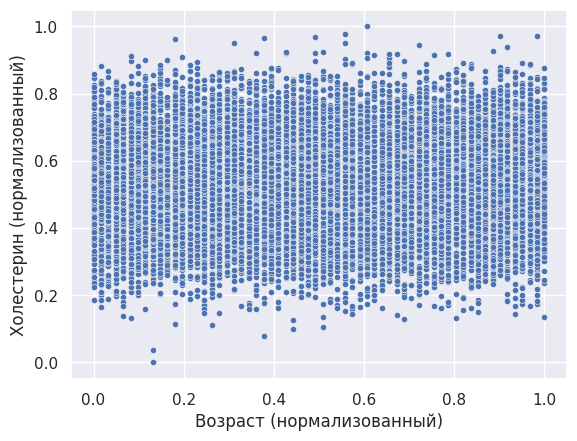

In [ ]:
sns.set(font_scale=1)
sns.scatterplot(
    x = 'age' ,
    y = 'cholesterol',
    data = DF_end,
    s=20
)
plt.xlabel("Возраст (нормализованный)")
plt.ylabel("Холестерин (нормализованный)")

Построение Гистограмм Возраста и Холестерина

Text(0, 0.5, 'Частота')

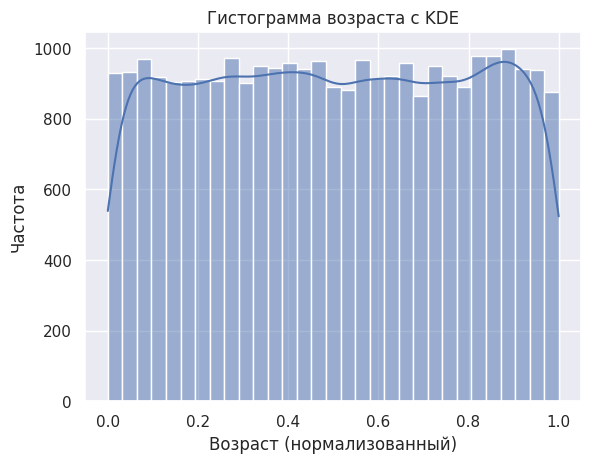

In [ ]:
sns.histplot(
    data=DF_end,
    x='age',
    kde = 'True')
plt.title('Гистограмма возраста с KDE')
plt.xlabel('Возраст (нормализованный)')
plt.ylabel('Частота')

Text(0, 0.5, 'Частота')

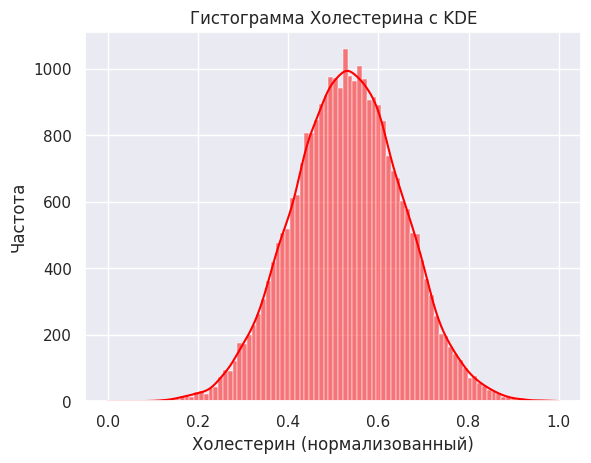

In [ ]:
sns.histplot(
    data=DF_end,
    x='cholesterol',
    kde = 'True',
    color = 'red')
plt.title('Гистограмма Холестерина с KDE')
plt.xlabel('Холестерин (нормализованный)')
plt.ylabel('Частота')

Построение ящика с усами для холестерина

/tmp/ipython-input-2956677407.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set_xticklabels(['Male',"Female"])
/tmp/ipython-input-2956677407.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,1].set_xticklabels(['Non-smoker', 'Light', 'Heavy'])
/tmp/ipython-input-2956677407.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,0].set_xticklabels(['Vegan',"Vegetarian","Omnivore","Keto"])
/tmp/ipython-input-2956677407.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,1].set_xticklabels(["Occasionally","Regularly"])


[Text(0, 0, 'Occasionally'), Text(1, 0, 'Regularly')]

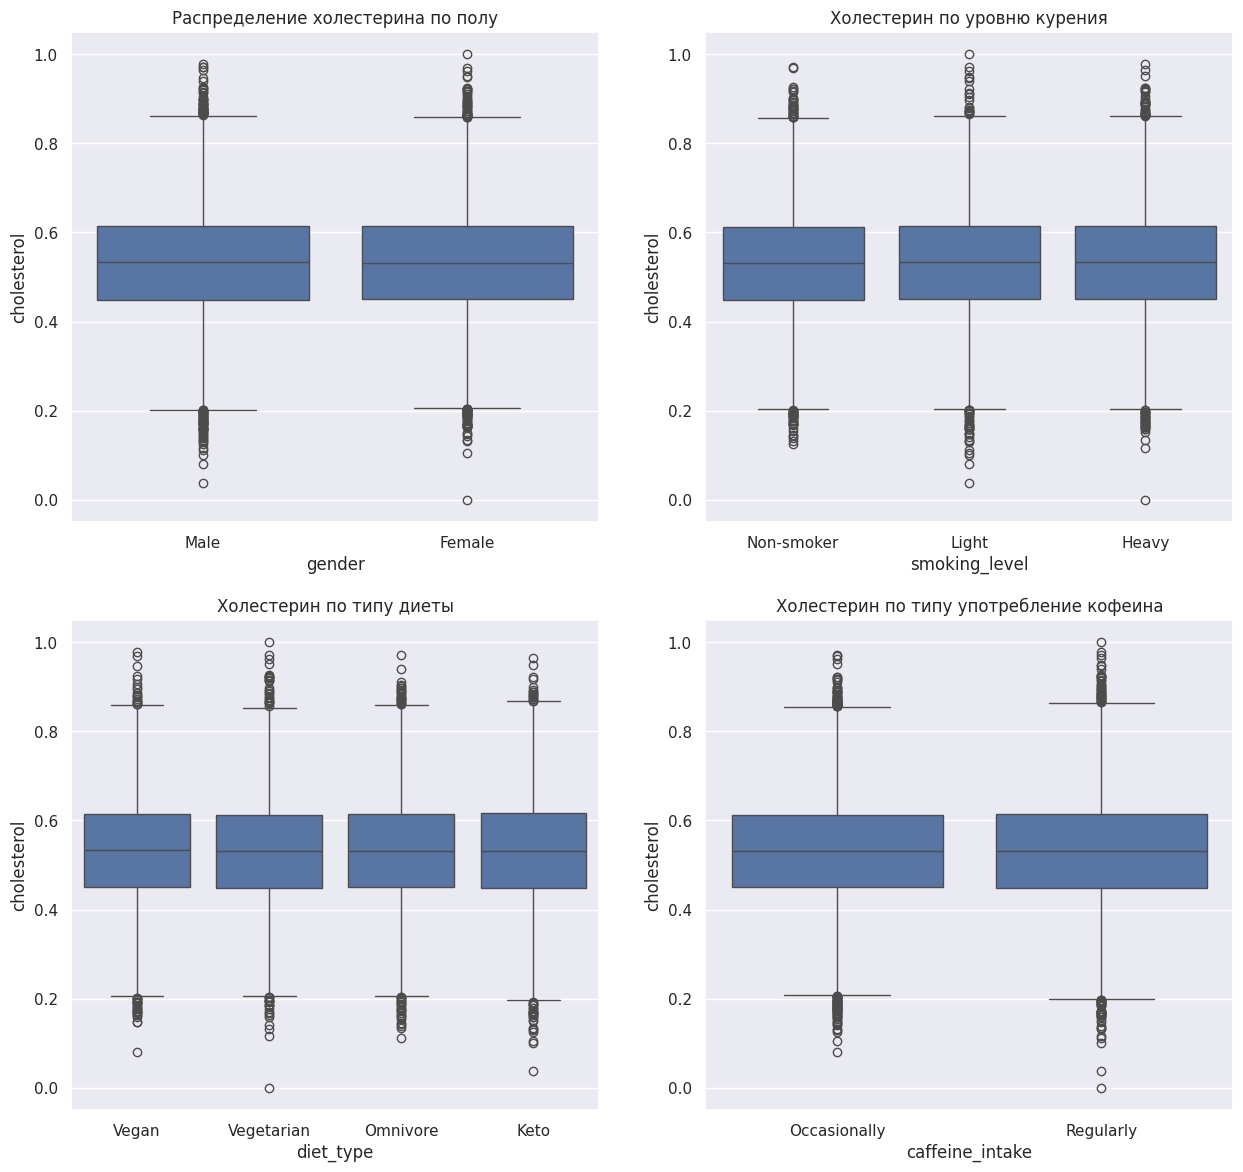

In [44]:
fig, axes = plt.subplots(2, 2, figsize=(15, 14))
sns.boxplot(
    data=DF_end,
    x='gender',
    y='cholesterol',
    ax=axes[0,0])
axes[0,0].set_title('Распределение холестерина по полу')
axes[0,0].set_xticklabels(['Male',"Female"])

sns.boxplot(data=DF_end,
            x='smoking_level',
            y='cholesterol',
            ax=axes[0,1])
axes[0,1].set_title('Холестерин по частоте курения')
axes[0,1].set_xticklabels(['Non-smoker', 'Light', 'Heavy'])

sns.boxplot(data=DF_end,
            x='diet_type',
            y='cholesterol',
            ax=axes[1,0])
axes[1,0].set_title('Холестерин по типу диеты')
axes[1,0].set_xticklabels(['Vegan',"Vegetarian","Omnivore","Keto"])

sns.boxplot(data=DF_end,
            x='caffeine_intake',
            y='cholesterol',
            ax=axes[1,1])
axes[1,1].set_title('Холестерин по частоте употребление кофеина')
axes[1,1].set_xticklabels(["Occasionally","Regularly"])

Кореляция данных

In [78]:
corr_DF = DF_end.corr(method='spearman')

def outliers_indices(feature):
    '''
    Будем считать выбросами все точки, выходящие за пределы трёх сигм.
    '''
    mid = DF_end[feature].mean()
    sigma = DF_end[feature].std()
    return DF_end[(DF_end[feature] < mid - 3*sigma) | (DF_end[feature] > mid + 3*sigma)].index

wrong_specificity = []
specificity = DF_end.select_dtypes(include = ['number']).copy()

for specif in specificity:
  num_specificity = outliers_indices(specif)
  wrong_specificity.extend(num_specificity)

out = set(wrong_specificity)
print(f"Найдено выбросов: {len(out)}" )
DF_clean = DF_end.drop(out)
print(f"Количество строк после удаления выбросов: {len(DF_clean)}")

Найдено выбросов: 36
Количество строк после удаления выбросов: 27642


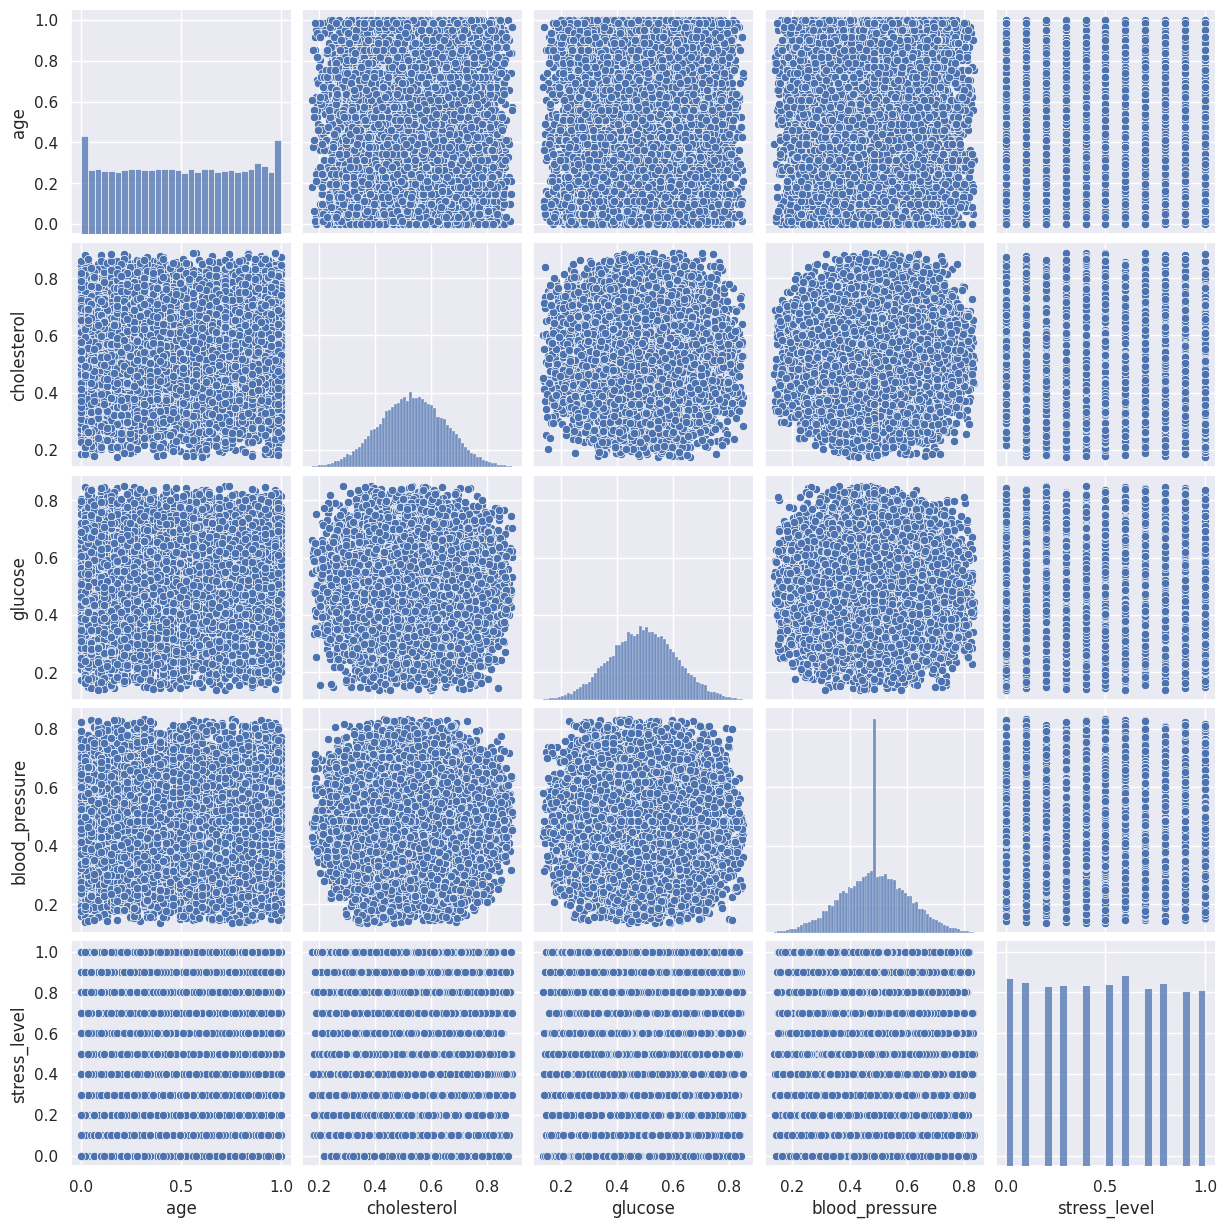

In [83]:
Key = ['age', 'cholesterol', 'glucose', 'blood_pressure', 'stress_level']

sns.pairplot(DF_clean[Key]);



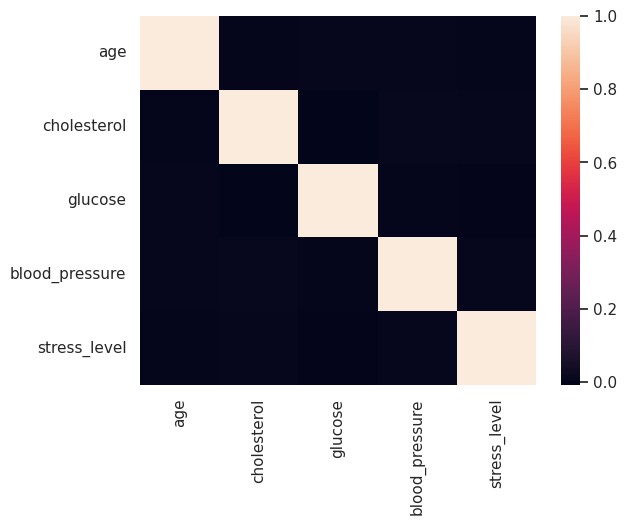

In [84]:
sns.heatmap(DF_clean[Key].corr(method='spearman'));